### Perceptron learning rule
$W_{i,j}^{(next step)} = W_{i,j} + \eta (y_j - \hat{y_j})x_i $

* $W_{i,j}$ is connection weight between the $i^th$ input neuron and the $j^{th}$ output neuron  
* $x_i$ is the $i^{th}$ input value of current training instance
* $y_i$ is the target output of the $j^{th}$ output neuron for current training instance
* $\hat{y_i}$ is the output of the $j^{th}$ output neuron for current training instance
* $\eta$ is the learning rate

### Scikit learn provides an option for single layer perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] #peral length, petal width
Y = (iris.target == 0).astype(np.int) #Setosa
per_clf = Perceptron(random_state = 42) #this makes the dependent 
per_clf.fit(X,Y)

print(per_clf.predict([[2,0.5]]))

[1]


C:\Users\Ashlesh B Shetty\Anaconda2\envs\starterbot\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Multi-Layer Perceptron and Backpropogation
More than one layer of perceptro is MLP
Backpropogation is nothing but Gradient Descent with reverse-mode autodiff

**Backpropogation** : For each training instance the back propogation algorithm first makes a prediction (forward pass), measures the error then goes through each layer in reverse to measure contribution from each connection (reverse pass) and finally slighly tweaks the connection weights to reduce the error (Gradient descent step)  

Inorder for this algorithm to work properly, the authors did a tweak and changed step function to other functions that can have a gradient descent. Few examples of **ativation functions** are
* Logistic function $ \frac{1}{1 + \exp^{-z}}$. This has outputs in the range of 0 to one.  
* The hyperbolic tangent function $(z) = 2 \sigma (2z) -1 $. similar to logistic function S shaped, continuous and diffferentiable. Output ranges from -1 to 1 . Which makes out put more close to normalised way centered around 0, leading to sppeding up convergence $  \tanh(x) =  \frac{\exp^{x} - \exp^{-x}}{\exp^{x} + \exp^{-x}}$  
* The ReLU function $ ReLU(z) = max(z,0)$. It is continuous but unfortunately not differentiable at Z = 0 (the slope changes abruptly and can make gradient descent jump around). In practice it works well becasue of advantage of speed, ainly because of the fact that it doesnot have maximum output value also helps reduce issues during Gradient Descent


### Learning Slowdown in DNN and how can that be addressed

**Note**:   
Reference
http://neuralnetworksanddeeplearning.com/chap3.html

Humans learn faster when we are badly wrong, but ANN learns slower when it is badly wrong but it performs and learns quickly when it is slighlty wrong    

The reason for this is when we take partial derivative of cost function wrt to weights we can see that rate of learing is very low when the output is close to 1. This is mainly due to the sigmoid shape of the activation function saturates when it is close to one the rate of change is very less.

Solution to learning slowdown is using **Cross Entropy Cost Function** instead of quaratic cost function

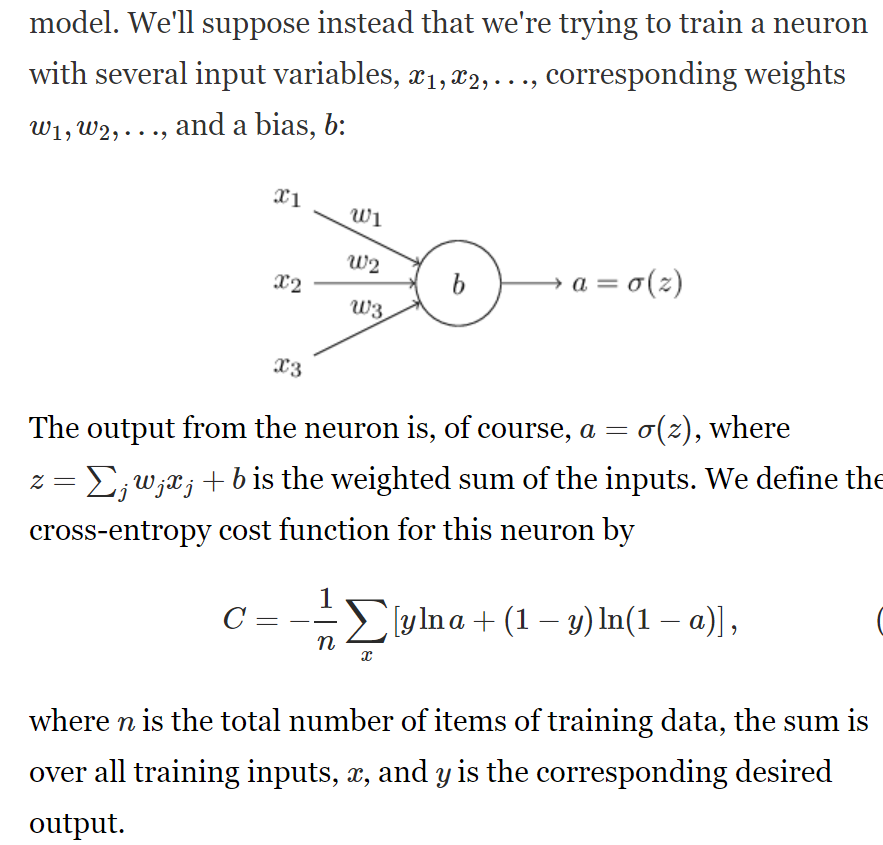

In [23]:
from IPython.display import Image
Image('C:\\Users\\Ashlesh B Shetty\\Desktop\\ZZ\\JobSearch\\GitHubRepos' +
      '\\DeepLearning-ArtificialIntelligence_ScikitLearn-TensorFlow\\images' + 
      '\\cross_entropy.png',
      width = 300)

Two properties of cross-entropy makes it behave like a cost function. 
1. it's non-negative, that is, C>0. To see this, notice that: (a) all the individual terms in the sum are negative, since both logarithms are of numbers in the range 0 to 1; and (b) there is a minus sign out the front of the sum.

2. if the neuron's actual output is close to the desired output for all training inputs, x, then the cross-entropy will be close to zero.

 To prove this I will need to assume that the desired outputs y are all either 0 or 1.     
 
 Suppose for example that y=0 and a≈0 for some input x. This is a case when the neuron is doing a good job on that input. We see that the first term in the expression for the cost vanishes, since y=0, while the second term is just −ln(1−a)≈0.    
 
 A similar analysis holds when y=1 and a≈1. And so the contribution to the cost will be low provided the actual output is close to the desired output.    
 
 Summing up, the cross-entropy is positive, and tends toward zero as the neuron gets better at computing the desired output, y, for all training inputs, x.

**How is cross entropy cost function helping to solve the prolem of Low entropy**

* When we had Quadratic cost function.and  When we do a partial derivative of cost function wrt to weights and biases we get a gradient function that has sigmoid function which is responsible for slow learning when the output is close to one.

* When we hav Cross entropy cost function.and  When we do a partial derivative of cost function wrt to weights and biases we get a gradient function where the sigmoid function cancels out. So our gradient is now just dependent on the magnitude of the error. There fore slow learning gets addressed when we use Cross entropy cost function

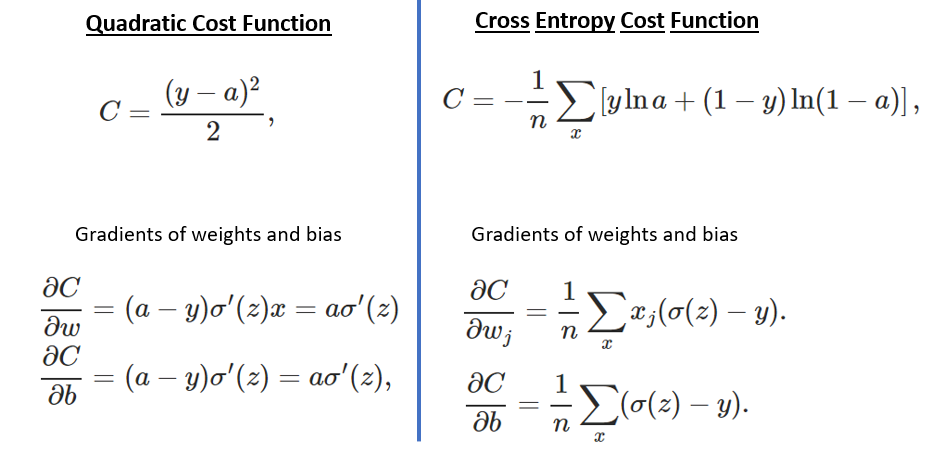

In [25]:
from IPython.display import Image
Image('C:\\Users\\Ashlesh B Shetty\\Desktop\\ZZ\\JobSearch\\GitHubRepos' +
      '\\DeepLearning-ArtificialIntelligence_ScikitLearn-TensorFlow\\images' + 
      '\\cross_entropy_vs_quadratic_cost.png',
      width = 600) 

### Training an MLP with Tensorflow's high level API. But as of 2018 March the tensorflow's high level API tf.contrib is still in experimentation phase. So just a sample code woul look like below

```python
import tensorflow as tf
features_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300,100], n_classes =10, feature_columns = feaure_cols)
dnn_clf = tf.contrib.learn.SKCompact(dnn_clf)
dnn_clf.fit(X_train,y_train,batch_size = 50, steps = 40000)

from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
accuracy_score_(y_test, y_pred['classes'])
```

The output layers in tf.contrib relies on softmax function and cross entropy cost fnction and it uses RELU as activation function

### For more control and stability lets not use high evel tf api. let us use LOW LEVEL Python APIs of TF
#### Construction Phase

In [ ]:
# Let us input some basic design of our 
n_inputs = 28*28 #MNIST
n_hidden1 = 300 #number of neurons in hidden layer one
n_hidden2 = 100 #number of neurons in hidden layer two
n_outputs = 10 #number of output values

# use placeholders
X = tf.placeholder(tf.float32, shpae = (None, n_inputs), name = "X") # since we don't know number of rows we keep None
y = tf.placeholder(tf.int64, shape = (None), name = "y") # Again we have just one column but dont know the number of rows

#function that creates a neuron layer
def neuron_layer(X,n_neurons, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        #below three lines are used for initialising weights. The truncated normdist is a tweak in DNN to converge fast
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neurons), stddev = stddev)
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
        Z = tf.matmul(X,W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        
# now let us build DNN
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name = "hidden1",hidden2hidden2 activation = tf.nn.relu)
    logits  = neuron_layer(hidden2, n_outputs, name = "outputs")

Above code could be shortened by using defaut tensorflow dense function instead of creating our own layer function

## Below code has construction phase from  1 to 8 and  9 to  end is execution phase

In [11]:
############ CONSTRUCTION PHASE

#(0) reset the constrution graph and call all the required libraries
import tensorflow as tf
tf.reset_default_graph()
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir,now)

import sklearn as sk
import numpy as np
from sklearn.preprocessing import StandardScaler

#(1) Let us input some basic design of our 
n_inputs = 28*28 #MNIST
n_hidden1 = 300 #number of neurons in hidden layer one
n_hidden2 = 100 #number of neurons in hidden layer two
n_outputs = 10 #number of output values

#(2) use placeholders for ingesting data by chunks
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X") # since we don't know number of rows we keep None
y = tf.placeholder(tf.int64, shape = (None), name = "y") # Again we have just one column but dont know the number of rows
        
#(3) now let us build DNN
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    logits  = tf.layers.dense(hidden2, n_outputs, name = "outputs")

#(4)incorporate components of softmax layer by calculating crossentropy error for each eanstance & mean over all instances
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
## sparse_softmax_cross_entropy_with_logits() function is equivalent ot applying the softmax activation function and then 
## computing the cross entropy, but it is more effcient andit properly takes care corner cases such as logits = 0

#(5) Let us define gradient descent optimizer, this tf optimizers simplify our work to a great extent
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#(6) let us uld the evaluation framework for the model   
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) #make the boolean to decimal to calcualte mean

#(7) initialise all the variables and save the model
init = tf.global_variables_initializer()
saver = tf.train.Saver()
 
#(8) create setup to visualize the computation graph on tensor board
mse_summary = tf.summary.scalar('loss',loss)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

#### EXECUTION PHASE

#(9) fetch the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

#(10) Decide bath_size and iterations and call the tf.session
n_epochs = 40
batch_size = 50
with tf.Session() as sess:
    for epoch in range(n_epochs):
        init.run()
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = StandardScaler().fit(X_batch).transform(X_batch)

            if iteration % 10 == 0:
                summary_str = mse_summary.eval(feed_dict = {X: X_batch, y:y_batch})
                step = epoch * (mnist.train.num_examples // batch_size) + iteration
                file_writer.add_summary(summary_str,step)

            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
            
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:StandardScaler().fit(mnist.test.images).transform(mnist.test.images), 
                                            y:mnist.test.labels})        
        print(epoch,"Train accuracy", acc_train, "Test accuracy", acc_test)
        
    save_path = saver.save(sess,'C:\\Users\\Ashlesh B Shetty\\Desktop\\ZZ\\JobSearch\\GitHubRepos'+
                           '\\DeepLearning-ArtificialIntelligence_ScikitLearn-TensorFlow\\images' + 
                           '\\my_model_final.ckpt')

file_writer.close()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0 Train accuracy 0.94 Test accuracy 0.9234
1 Train accuracy 0.92 Test accuracy 0.9242
2 Train accuracy 0.94 Test accuracy 0.9195
3 Train accuracy 0.98 Test accuracy 0.9252
4 Train accuracy 0.98 Test accuracy 0.9211
5 Train accuracy 0.92 Test accuracy 0.9247
6 Train accuracy 0.92 Test accuracy 0.9184
7 Train accuracy 0.98 Test accuracy 0.9234
8 Train accuracy 0.98 Test accuracy 0.9223
9 Train accuracy 0.84 Test accuracy 0.9191
10 Train accuracy 0.92 Test accuracy 0.9215
11 Train accuracy 0.94 Test accuracy 0.9233
12 Train accuracy 0.9 Test accuracy 0.9183
13 Train accuracy 0.9 Test accuracy 0.9192
14 Train accuracy 0.94 Test accuracy 0.9243
15 Train accuracy 0.9 Test accuracy 0.9222
16 Train accuracy 0.98 Test accuracy 0.9226
17 Train accuracy 0.94 Test accuracy 0.925
18 Train accuracy 0.94 Test accu

In [12]:
!ls -l tf_logs/

total 0
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 11 18:12 run-20180311231251
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 11 18:34 run-20180311233432
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 11 18:45 run-20180311234508
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 12 17:10 run-20180312221006
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 12 17:10 run-20180312221055
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 12 17:24 run-20180312222418
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 12 17:44 run-20180312224429
drwxr-xr-x 1 Ashlesh B Shetty 197121 0 Mar 12 17:48 run-20180312224807


Sample output
TensorBoard 1.6.0 at http://LAPTOP-233T38K5:6006 (Press CTRL+C to quit)

Graph for classification of digits in MNIST data. 
* Using DNN with 2 hidden layers with 300 and 100 neuron respectively. 
* 10 output and $ 28 \times 28 $ inputs
* With ReLU as activation functiona and Accuracy as evaluation metrics
* cross entropy as loss function (tf.nn.sparse_softmax_crossentropy_with_logits)  

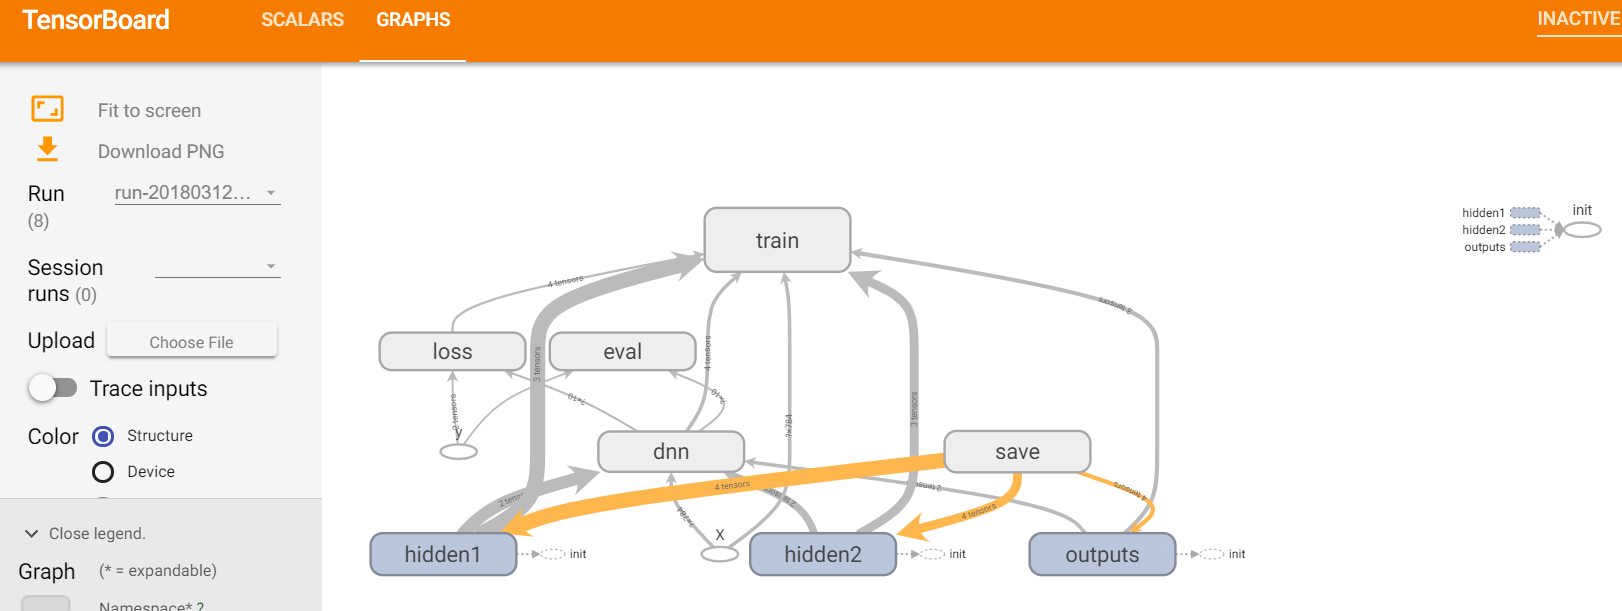

In [20]:
from IPython.display import Image
Image('C:\\Users\\Ashlesh B Shetty\\Desktop\\ZZ\\JobSearch\\GitHubRepos' +
      '\\DeepLearning-ArtificialIntelligence_ScikitLearn-TensorFlow\\images' + 
      '\\mnist_DNN_ch10.png',
      width = 800)

## PREDICTION
### If we were supposed to predict using the model built above
Now just for example I'm using test data itsef for prediciton. In general we will have a fresh data that needs to be predicted

In [1]:
import tensorflow as tf
tf.reset_default_graph()
import sklearn as sk
import numpy as np
from sklearn.preprocessing import StandardScaler

#(1) Let us input some basic design of our 
n_inputs = 28*28 #MNIST
n_hidden1 = 300 #number of neurons in hidden layer one
n_hidden2 = 100 #number of neurons in hidden layer two
n_outputs = 10 #number of output values

#(2) use placeholders for ingesting data by chunks
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X") # since we don't know number of rows we keep None
y = tf.placeholder(tf.int64, shape = (None), name = "y") # Again we have just one column but dont know the number of rows
        
#(3) now let us build DNN
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    logits  = tf.layers.dense(hidden2, n_outputs, name = "outputs")

#(4)incorporate components of softmax layer by calculating crossentropy error for each eanstance & mean over all instances
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
## sparse_softmax_cross_entropy_with_logits() function is equivalent ot applying the softmax activation function and then 
## computing the cross entropy, but it is more effcient andit properly takes care corner cases such as logits = 0

#(5) Let us define gradient descent optimizer, this tf optimizers simplify our work to a great extent
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#(6) let us uld the evaluation framework for the model   
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) #make the boolean to decimal to calcualte mean

#(7) initialise all the variables and save the model
init = tf.global_variables_initializer()
saver = tf.train.Saver()
 
#(8) create setup to visualize the computation graph on tensor board
mse_summary = tf.summary.scalar('loss',loss)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

### Prediction code snippet
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
with tf.Session() as sess:
    saver.restore(sess,'C:\\Users\\Ashlesh B Shetty\\Desktop\\ZZ\\JobSearch\\GitHubRepos'+
                  '\\DeepLearning-ArtificialIntelligence_ScikitLearn-TensorFlow\\images' +
                  '\\my_model_final.ckpt')
    X_new_scaled = StandardScaler().fit(mnist.test.images).transform(mnist.test.images)
    Z = logits.eval(feed_dict = {X:X_new_scaled})
    y_pred = np.argmax(Z, axis =1)

print(y_pred[:2,])

NameError: name 'logdir' is not defined

### Fine tuning neural retwork hyperparameters

* Random search is a better option than grid search for **tuning**
* Number of **hidden layers:** We can get result of DNN in Shallow NN but we will need a lot of neurons and exponentially larger parameters to adjuct. So having multiple layers much more efficient and faster. having multiple levels lower levels takes care of simple strucutres like circle etc and higher level takes care of faces for example. so we can reuse lower levels for initialising if we are intersted in other higher level features like hairstyle instead of face.
 
 This allows to reuse layer of pretrained models in other models to save time and will require less data.
 
* **Number of neurons** common practice is size the neurons in each layer form a funnel. so in above code input 784 next hidden layer 300 neurons and next hidden layer 100 and final output 10
 
 But inpractice it is also commonto have same number of neurons across layuers. i.e. just one hyperparameter to tune instead of one per layer
 
 We can also try increasing number of neurons in hidden layer until there is no overfitting
 
 Generally increasing number of layers gives better result over increasing number of neurons in layers
 
 **StretchPantApproach** : one solution is use number of layers and neurons more than you need and use early stopping or dropout to prevent it from overfitting 
 
* **Activation Function** ReLU preferred. And for Softmax function preferred for output layer for classification task and for regression you can use no activation function
 

